In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.ticker import AutoMinorLocator
#plt.rcParams["mathtext.fontset"] = "cm"
#plt.rcParams['mathtext.default']='regular'

# Full Periodic Plot

0.3627719820611709 0.8131067421886655 1.0897460342906164


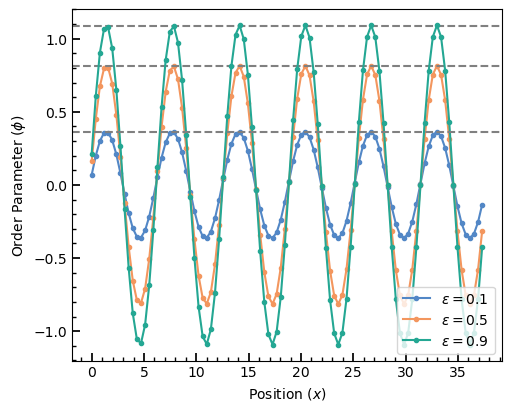

In [41]:
theo_amp = lambda eps: 2*np.sqrt(eps/3)
grid_points = 257
natural_period = 2*np.pi
one_sixteenth_period = 1/16*natural_period
total_domain_length = (grid_points-1)*one_sixteenth_period
domain_points = np .linspace(0, total_domain_length, grid_points)

eps9 = np.loadtxt('eps=0.9 periodic.txt')[2:-2,2]
eps5 = np.loadtxt('eps=0.5 periodic.txt')[2:-2,2]
eps1 = np.loadtxt('eps=0.1 periodic.txt')[2:-2,2]

phi_profiles = np.array([eps1,eps5,eps9])
eps_values = np.array([0.1,0.5,0.9])

colors = ['#5287C6','#F3965E','#24A793','#C00A35']


amp9 = np.mean(np.array([eps9[peak] for peak in find_peaks(eps9)[0]]))
amp5 = np.mean(np.array([eps5[peak] for peak in find_peaks(eps5)[0]]))
amp1 = np.mean(np.array([eps1[peak] for peak in find_peaks(eps1)[0]]))
amps = np.array([amp9, amp5, amp1])
print(amp1, amp5, amp9)


# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(5, 4))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(3):
    curve = ax.plot(domain_points[:96], phi_profiles[nn][:96], marker = '.', label=r'$\epsilon=$'+f'{eps_values[nn]}', color=colors[nn])
    ax.axhline(amps[nn], color='#808080', linestyle='dashed')

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0)
ax.legend(loc='lower right')
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Order Parameter ($\phi$)')


plt.savefig('Full Periodic Decompisition.jpg', dpi=1800)
plt.show()

# Steady Single Cell

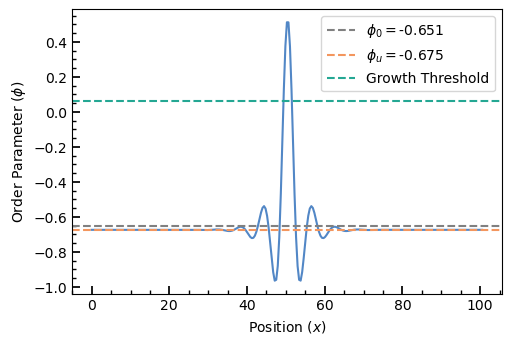

In [3]:
single257 = np.loadtxt(r'Data to Compare to Literature\Steady phi=-0.65 amp=0.1.txt')
single513 = np.loadtxt(r'Data to Compare to Literature\Steady phi=-0.66 amp=0.1.txt')


phi_uni = -0.675
phi_per = -0.243
phi_profiles = [single257, single513]
phi0_vals = [np.mean(single257).round(3), np.mean(single513).round(3)]
colors = ['#5287C6','#F3965E','#24A793']

# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(5, 3.33))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(1):
    curve = ax.plot(domain_points, phi_profiles[nn], color=colors[nn])
    ax.axhline(phi0_vals[nn], color='#808080', linestyle='dashed', label=r'$\phi_0=$'+f'{phi0_vals[nn]}')
    ax.axhline(phi_uni, color=colors[1], linestyle='dashed', label=r'$\phi_u=$'+f'{phi_uni}')
    ax.axhline(0.06, color=colors[2], linestyle='dashed', label=r'Growth Threshold')
    
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0)
ax.legend(loc='upper right')
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Order Parameter ($\phi$)')


plt.savefig('Growth & Steady Single Cell 257.jpg', dpi=1800)
plt.show()

# Coexistence Steady States

(2, 500)
[ 0.06725615 -4.09737949] [[ 1.92101951e-06 -6.01816460e-06]
 [-6.01816460e-06  1.88698074e-05]] [0.00138601 0.00434394]


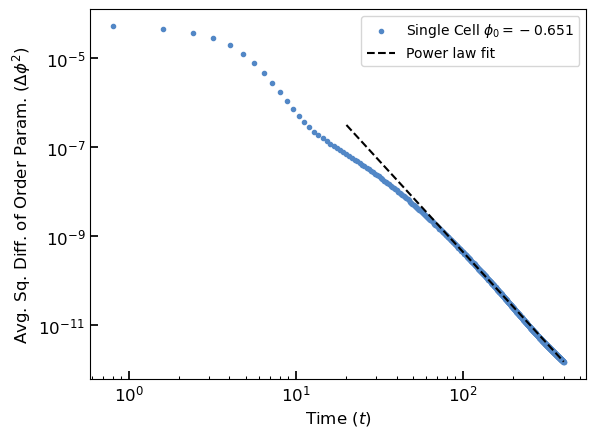

In [21]:
from scipy.optimize import curve_fit
# Power-law fitting function
def power_law_fit(x, a, b):
    return a * np.power(x, b)

snapshots_single_cell = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.65 amp=0.1.txt')
power_law_single_cell = [snapshots_single_cell[0,125:],snapshots_single_cell[1,125:]]
print(snapshots_single_cell.shape)
fig, ax = plt.subplots()
ax.scatter(snapshots_single_cell[0,1:], snapshots_single_cell[1,1:], marker='.', color='#5287C6', label=r'Single Cell $\phi_0 = -0.651$')

# Fit the power-law curve
params, covariance = curve_fit(power_law_fit, power_law_single_cell[0], power_law_single_cell[1])
perr = np.sqrt(np.diag(covariance))
print(params, covariance, perr)
# Generate fitted values
fitted_yvals = power_law_fit(snapshots_single_cell[0,25:], *params)

ax.plot(snapshots_single_cell[0,25:], fitted_yvals, '--', color='#000000', label='Power law fit')

ax.set_xlabel(r'Time ($t$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=0.75, length=2.5, labelsize='medium')
ax.legend()
plt.savefig(f'Single Cell Snapshots.jpg', dpi=1800)
plt.show()


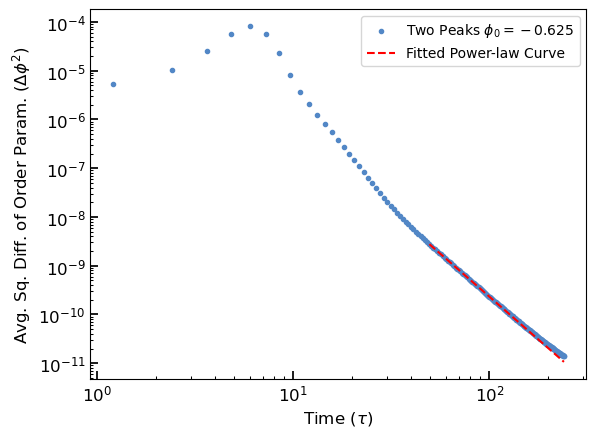

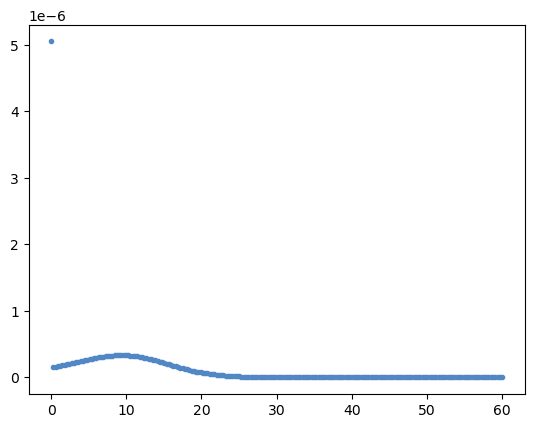

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [5]:
snapshots625_one_peak_tall_sides = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.625 amp=0.1.txt')
snapshots5_seven_peaks = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.5 amp=0.1.txt')
snapshots_full = np.loadtxt(r'Steady State Snapshots\Snapshots phi=0 amp=0.1.txt')
snapshots625_two_peaks = np.loadtxt(r'Steady State Snapshots\Snapshots phi=-0.625 amp=0.05.txt')
power_law_two_peaks = [snapshots625_two_peaks[0,41:],snapshots625_two_peaks[1,41:]]

fig, ax = plt.subplots()
ax.scatter(snapshots625_two_peaks[0,1:], snapshots625_two_peaks[1,1:], marker='.', color='#5287C6', label=r'Two Peaks $\phi_0 = -0.625$')

# Fit the power-law curve
params, covariance = curve_fit(power_law_fit, power_law_two_peaks[0], power_law_two_peaks[1])
# Generate fitted values
fitted_yvals = power_law_fit(power_law_two_peaks[0], *params)

ax.plot(power_law_two_peaks[0], fitted_yvals, 'r--', label='Fitted Power-law Curve')


ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=0.75, length=2.5, labelsize='medium')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.625 amp=0.05.jpg', dpi=1800)
plt.show()





plt.scatter(snapshots_full[0,:], snapshots_full[1,:], marker='.', color='#5287C6', label=r'Full Periodic')
ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=0.75, length=2.5, labelsize='medium')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.625 amp=0.1.jpg', dpi=1800)
plt.show()



ax.scatter(snapshots625_one_peak_tall_sides[0,1:], snapshots625_one_peak_tall_sides[1,1:], marker='.', color='#5287C6', label=r'One Peak $\phi_0 = -0.625$')
ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.625 amp=0.05.jpg', dpi=1800)
plt.show()

ax.scatter(snapshots5_seven_peaks[0,:], snapshots5_seven_peaks[1,:], marker='.', color='#5287C6', label=r'Seven Peaks $\phi_0 = -0.5$')
ax.set_xlabel(r'Time ($\tau$)', fontsize='large')
ax.set_ylabel(r'Avg. Sq. Diff. of Order Param. ($\Delta\phi^2$)', fontsize='large')
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(direction="in", width=1.25, labelsize='large')
ax.legend()
plt.savefig(f'Avg Sq Diff phi=-0.5 amp=0.1.jpg', dpi=1800)
plt.show()

# Comparing Steady States with Literature

In [22]:
from scipy.interpolate import make_interp_spline

def spline_from_lit_data(filename):
    spline = np.zeros(grid_points)
    lit_data = np.loadtxt(filename)
    lit_data[:,0] = lit_data[:,0]*total_domain_length
    lit_data[:,1] = lit_data[:,1]
    sorted_lit_data = lit_data[lit_data[:, 0].argsort()]
    spline_lit_data = make_interp_spline(sorted_lit_data[:,0], sorted_lit_data[:,1], k=1)
    return spline_lit_data(domain_points)


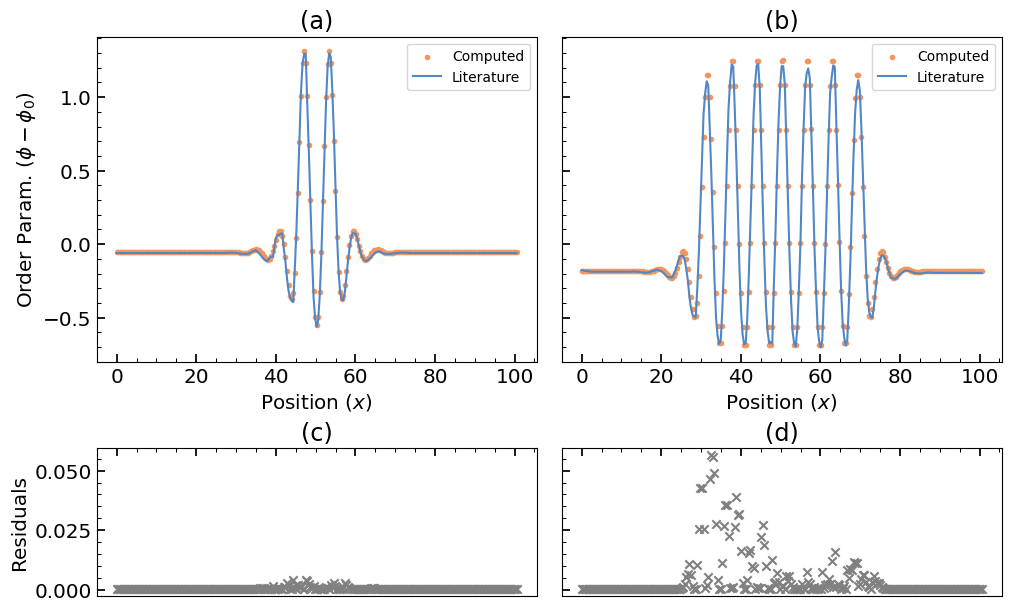

In [23]:
average_phis = [-0.625, -0.5]

twopeaks625 = np.loadtxt(r'Data to Compare to Literature\Steady' + f' phi=-0.625 amp=0.05.txt')
twopeaks_filename = '-0.625 even 2 tall peaks'
twopeaks_lit_data = np.loadtxt(r'Literature Data\Paper ' + twopeaks_filename + ' Dataset.txt')
twopeaks_lit_data[:,0] = twopeaks_lit_data[:,0]*total_domain_length


onepeak625 = np.loadtxt(r'Data to Compare to Literature\Steady' + f' phi=-0.625 amp=0.1.txt')
onepeak_filename = '-0.625 odd 1 tall peak short sides'
onepeak_lit_data = np.loadtxt(r'Literature Data\Paper ' + onepeak_filename + ' Dataset.txt')
onepeak_lit_data[:,0] = onepeak_lit_data[:,0]*total_domain_length

sevenpeaks5 = np.loadtxt(r'Data to Compare to Literature\Steady' + f' phi=-0.5 amp=0.1.txt')
sevenpeaks_filename = '-0.5 odd 7 peaks'
sevenpeaks_lit_data = np.loadtxt(r'Literature Data\Paper ' + sevenpeaks_filename + ' Dataset.txt')
sevenpeaks_lit_data[:,0] = sevenpeaks_lit_data[:,0]*total_domain_length

twopeaks_spline = spline_from_lit_data(r'Literature Data\Paper ' + twopeaks_filename + ' Dataset.txt')
onepeak_spline = spline_from_lit_data(r'Literature Data\Paper ' + onepeak_filename + ' Dataset.txt')
sevenpeaks_spline = spline_from_lit_data(r'Literature Data\Paper ' + sevenpeaks_filename + ' Dataset.txt')


onepeak625 = np.roll(onepeak625, grid_points-1)
twopeaks625 = np.roll(twopeaks625, grid_points-1)
#sevenpeaks5 = np.roll(sevenpeaks5, grid_points-2)

mixed_states = np.array([twopeaks625, sevenpeaks5])

lit_data = [twopeaks_spline, sevenpeaks_spline]

fig = plt.figure(layout='constrained', figsize=(10, 6))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0.05, height_ratios=[2.2,1])

axsTop, axsBottom = gs.subplots(sharex='col', sharey='row')

top_titles = ['(a)', '(b)']
bottom_titles = ['(c)', '(d)']

for nn, ax in enumerate(axsTop):
    ax.scatter(domain_points, mixed_states[nn]-average_phis[nn], marker='.', color='#F3965E', label='Computed')
    ax.plot(domain_points, lit_data[nn], color='#5287C6', label='Literature')
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_title(top_titles[nn], fontsize='xx-large')
    ax.tick_params(labelbottom=True, which='major', direction="in", width=1.25, length=6.0, labelsize='x-large')
    ax.tick_params(which='minor', direction="in", width=0.75, length=3.0, labelsize='large')
    ax.legend(loc='upper right')
    ax.set_xlabel(r'Position ($x$)', fontsize='x-large')
    if nn == 0:
        ax.set_ylabel(r'Order Param. ($\phi - \phi_0$)', fontsize='x-large')
        
for nn, ax in enumerate(axsBottom):
    ax.scatter(domain_points, (lit_data[nn]-(mixed_states[nn]-average_phis[nn]))**2, marker='x', color='#808080')
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.set_title(bottom_titles[nn], fontsize='xx-large')
    ax.tick_params(top=True, bottom=False, labelbottom=False, which='major', direction="in", width=1.25, length=6.0, labelsize='x-large')
    ax.tick_params(top=True, bottom=False, which='minor', direction="in", width=0.75, length=3.0, labelsize='large')
    #ax.legend(loc='upper right')
    if nn == 0:
        ax.set_ylabel(r'Residuals', fontsize='x-large')

        
plt.savefig('Steady State Comparisons.jpg', dpi=1500)
plt.show()

# Phase Diagram

132


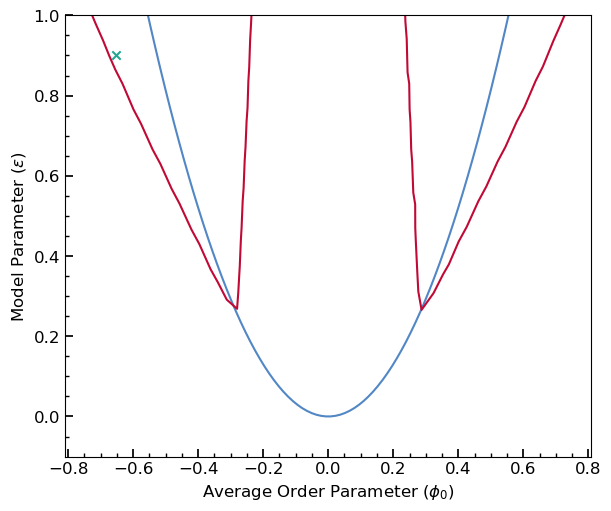

In [22]:
phi_nought = np.linspace(-0.75,0.75,100)

coexistence_lines = np.loadtxt('1D Coexistence Redlines.txt')
coexistence_lines[:,1] = -1*coexistence_lines[:,1]
print(coexistence_lines.size)
colors = ['#5287C6','#F3965E','#24A793', '#C00A35']


fig = plt.figure(layout='constrained', figsize=(6, 5))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
marginal = ax.plot(phi_nought*0.96, 3*phi_nought**2, label=r'Marginal Stability', color=colors[0])
#full_periodic = ax.scatter([0, 0, 0], [0.1 ,0.5, 0.9], color='#000000', marker='x')
coexistence_left = ax.plot(coexistence_lines[:34,0], coexistence_lines[:34,1], label=r'Coexistence Curves', color = colors[3])
coexistence_right = ax.plot(coexistence_lines[34:,0], coexistence_lines[34:,1], color = colors[3])
single_cell = ax.scatter(-0.651, 0.9, label=r'Single Cell', color=colors[2], marker='x')
#coexistence_boundaries = ax.scatter([-0.675, -0.243], [0.9, 0.9], marker='s', label=r'Coexistence Boundaries', color = colors[1])
#lit_comparison = ax.scatter([-0.625], [0.9], color='#000000', marker='x')

plt.ylim(-0.1,1.0)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0, labelsize='medium')
#ax.legend(loc='lower right')
ax.set_xlabel(r'Average Order Parameter ($\phi_0$)', fontsize='large')
ax.set_ylabel(r'Model Parameter ($\epsilon$)', fontsize='large')

plt.savefig('Phase Diagram.jpg', dpi=1800)
plt.show()

# Pattern Formation by Mode

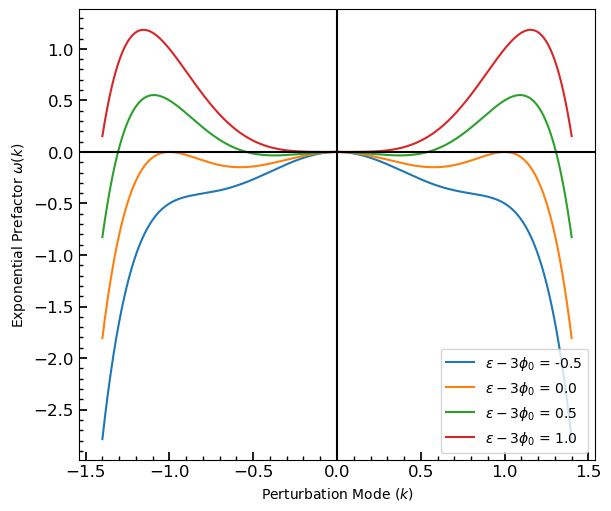

In [13]:
#Here we plot the for, of the growth term
omega = lambda delta,x: (x**2)*(delta-(1-x**2)**2)

delta_values = np.linspace(-0.5, 1, 4)
x_values_large = np.linspace(-1.4,1.4,10000)


fig = plt.figure(layout='constrained', figsize=(6, 5))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()

for delta in delta_values:
    y_k = omega(delta, x_values_large)
    ax.plot(x_values_large, y_k, label = r'$\epsilon - 3\phi_0$' + f' = {delta.round(3)}')

    

#plt.xlim([0, 5])
ax.set_xlabel(r'Perturbation Mode ($k$)')
ax.set_ylabel(r'Exponential Prefactor $\omega(k)$')
ax.legend(loc='lower right')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0, labelsize='large')
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0, labelsize='medium')

plt.savefig('Speed of Pattern Formation.jpg', dpi = 1500)
plt.show()

# Ruh Roh It's Growth Time, Can we Characterize How the Domain is Filled?

In [48]:
growth_and_cells_257 = np.loadtxt(r'New Cell Times\Growth vs. New Cells 257.txt')
growth_and_cells_513 = np.loadtxt(r'New Cell Times\Growth vs. New Cells 513.txt')
growth_and_cells_1025 = np.loadtxt(r'New Cell Times\Growth vs. New Cells 1025.txt')


In [49]:
new_cell_times_257 = growth_and_cells_257[0]
all_g_values_257 = growth_and_cells_257[1]
new_cell_times_513 = growth_and_cells_513[0]
all_g_values_513 = growth_and_cells_513[1]
new_cell_times_1025 = growth_and_cells_1025[0]
all_g_values_1025 = growth_and_cells_1025[1]

g_vals = [all_g_values_257, all_g_values_513, all_g_values_1025]
all_cell_times = [new_cell_times_257, new_cell_times_513, new_cell_times_1025]

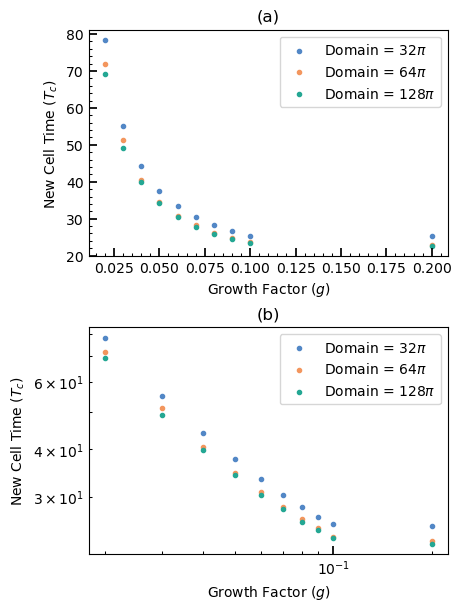

In [55]:
domains = [32,64,128]


fig = plt.figure(layout='constrained', figsize=(4.5, 6))
gs = fig.add_gridspec(2, 1, hspace=0, wspace=0.05, height_ratios=[1,1])

axs = gs.subplots()

top_titles = ['(a)', '(b)']

for nn, ax in enumerate(axs):

    if nn==0:
        for i in range(3):
            curve = ax.scatter(g_vals[i], all_cell_times[i], marker = '.', label=f'Domain = {domains[i]}'+r'$\pi$', color=colors[i])
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    
        
    else:
        for i in range(3):
            curve = ax.scatter(g_vals[i], all_cell_times[i], marker = '.', label=f'Domain = {domains[i]}'+r'$\pi$', color=colors[i])
        ax.set_xscale('log')
        ax.set_yscale('log')

        
    ax.set_ylabel(r'New Cell Time ($T_c$)')
    ax.set_xlabel(r'Growth Factor ($g$)')
    ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
    ax.tick_params(which='minor', direction="in", width=0.75, length=2.5)
    ax.set_title(top_titles[nn], fontsize='large')
    ax.legend()
    
plt.savefig(f'New Cell Times.jpg', dpi=1800)
plt.show()


In [ ]:

# lin-lin
plt.scatter(new_cell_times_256, all_g_values_256, label = f'Domain = {domain_256}')
plt.scatter(new_cell_times_512, all_g_values_512, label = f'Domain = {domain_512}')
plt.scatter(new_cell_times_1024, all_g_values_1024, label = f'Domain = {domain_1024}')
plt.ylabel(r'Growth Constant ($g$)')
plt.xlabel(r'New Cell Time ($T_c$)')
plt.legend()
plt.savefig('growth vs. new cells.jpg', dpi=1200)
plt.show()

# log-log
plt.scatter(np.log(new_cell_times_256), np.log(all_g_values_256), label = f'Domain = {domain_256}')
plt.scatter(np.log(new_cell_times_512), np.log(all_g_values_512), label = f'Domain = {domain_512}')
plt.scatter(np.log(new_cell_times_1024), np.log(all_g_values_1024), label = f'Domain = {domain_1024}')
plt.ylabel(r'Log Growth Constant ($\ln g$)')
plt.xlabel(r'Log New Cell Time ($\ln T_c$)')
plt.legend()
plt.savefig('log-log growth vs. new cells.jpg', dpi=1200)
plt.show()

# lin-log
plt.scatter(new_cell_times_256, np.log(all_g_values_256), label = f'Domain = {domain_256}')
plt.scatter(new_cell_times_512, np.log(all_g_values_512), label = f'Domain = {domain_512}')
plt.scatter(new_cell_times_1024, np.log(all_g_values_1024), label = f'Domain = {domain_1024}')
plt.ylabel(r'Log Growth Constant ($\ln g$)')
plt.xlabel(r'New Cell Time ($T_c$)')
plt.legend()
plt.savefig('lin-log growth vs. new cells.jpg', dpi=1200)
plt.show()

#log-lin
plt.scatter(np.log(new_cell_times_256), all_g_values_256, label = f'Domain = {domain_256}')
plt.scatter(np.log(new_cell_times_512), all_g_values_512, label = f'Domain = {domain_512}')
plt.scatter(np.log(new_cell_times_1024), all_g_values_1024, label = f'Domain = {domain_1024}')
plt.ylabel(r'Growth Constant ($g$)')
plt.xlabel(r'Log New Cell Time ($\ln T_c$)')
plt.legend()
plt.savefig('log-lin growth vs. new cells.jpg', dpi=1200)
plt.show()


# log-loglog
plt.scatter(np.log(np.log(new_cell_times_256)), np.log(all_g_values_256), label = f'Domain = {domain_256}')
plt.scatter(np.log(np.log(new_cell_times_512)), np.log(all_g_values_512), label = f'Domain = {domain_512}')
plt.scatter(np.log(np.log(new_cell_times_1024)), np.log(all_g_values_1024), label = f'Domain = {domain_1024}')
plt.ylabel(r'Log Growth Constant ($\ln g$)')
plt.xlabel(r'Log log New Cell Time ($\ln\ln T_c$)')
plt.legend()
plt.savefig('log-loglog growth vs. new cells.jpg', dpi=1200)
plt.show()

C:\Users\taylo\AppData\Local\Temp\ipykernel_4836\563193842.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


0.5477225575051661 0.9859006035092989 20


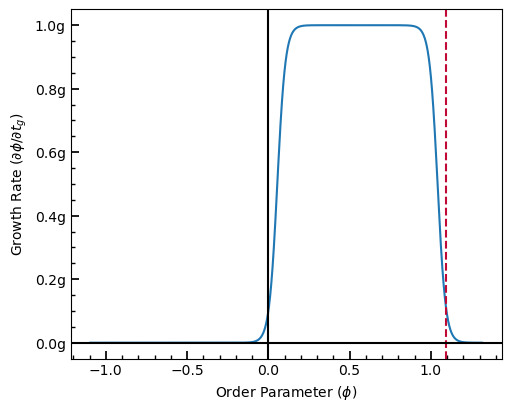

In [5]:
import cmath as cm

epsilon = 0.9
phase_amp = 2*np.sqrt(epsilon/3)
growth_factor=1
sigmoid=20
width=phase_amp*9/10
center=phase_amp/2


growth = lambda g,S,C,W,x: g*(np.tanh(S*(x-C+W/2))*np.tanh(S*(-x+C+W/2)) + 1)/2
#Here we plot the form of the growth term

x_values_large = np.linspace(-phase_amp,phase_amp*1.2, 10000)
y_growth = growth(growth_factor,sigmoid,center,width, x_values_large)

fig = plt.figure(layout='constrained', figsize=(5, 4))
subfigs = fig.subfigures(wspace=0.07)
ax = subfigs.subplots()

ax.plot(x_values_large, y_growth, label = f'g = {growth_factor} S = {sigmoid} C = {np.round(center,3)} W = {np.round(width,3)}')

labels = [item.get_text() for item in ax.get_yticklabels()]
labels =[labels[i]+'g' for i in range(7)]

ax.set_yticklabels(labels)

ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0)
#ax.legend(loc='lower right')
ax.set_xlabel(r'Order Parameter ($\phi$)')
ax.set_ylabel(r'Growth Rate ($\partial \phi/\partial t_g$)')
plt.axvline(x=phase_amp, color=colors[2], linestyle='dashed')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
#center_spot = ax.scatter(center, 0, label=r'Center', color=colors[2], marker='o')

print(center, width, sigmoid)

plt.savefig(f'g={growth_factor}.jpg', dpi = 1800)
plt.show()

# Growth Snapshots: Distinct Cells, High g, Low g

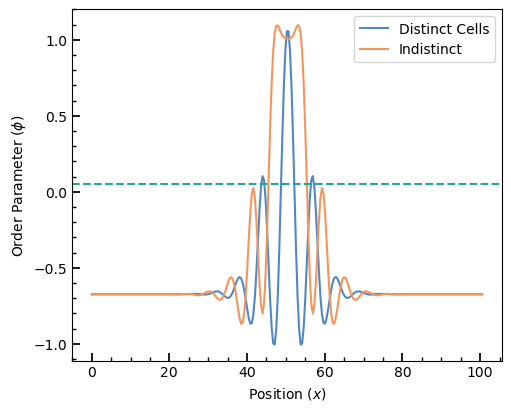

In [6]:
distinct_cells = np.loadtxt(r'Snapshots around New Cell Times\After 257 eps=0.9 g=0.05 initphi=-0.651.txt')
no_distinction = np.loadtxt(r'Snapshots around New Cell Times\Before 257 eps=0.9 g=0.175 initphi=-0.651.txt')


phi_uni = -0.675
phi_per = -0.243
colors = ['#5287C6','#F3965E','#C00A35','#24A793']

phi_profiles = [distinct_cells, no_distinction]

# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(5, 4))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(2):
    if nn==0:
        curve = ax.plot(domain_points, phi_profiles[nn], color=colors[nn], label='Distinct Cells')
    if nn==1:
        curve = ax.plot(domain_points, phi_profiles[nn], color=colors[nn], label='Indistinct')

ax.axhline(center-width/2, color=colors[3], linestyle='dashed')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0)
ax.legend(loc='upper right')
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Order Parameter ($\phi$)')


plt.savefig('Distinct and Non-Distinct Cells.jpg', dpi=1800)
plt.show()

[ 98 113 128 144 159] [ 96 111 128 146 161]
[105 120 137 152] [ 88 103 117 140 154 169]


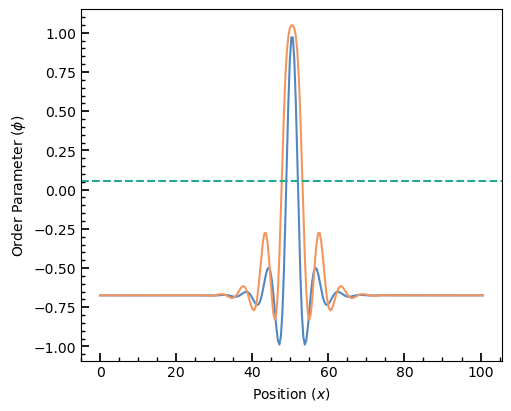

In [35]:
from scipy.signal import find_peaks

widening_snapshots = []

widening_snapshots.append(np.loadtxt(r'Snapshots of Growth\ 257 eps=0.9 g=0.175 frame=' + f'{20}' + '.txt'))

widening_snapshots.append(np.loadtxt(r'Snapshots of Growth\ 257 eps=0.9 g=0.175 frame=' + f'{70}' + '.txt'))
    
colors = ['#5287C6','#F3965E','#C00A35','#24A793']


peaks_natural = find_peaks(widening_snapshots[0], phi_uni + 0.01)[0]
peaks_widened = find_peaks(widening_snapshots[1], phi_uni + 0.01)[0]
troughs_natural = find_peaks(-widening_snapshots[0], -(phi_uni - 0.01))[0]
troughs_widened = find_peaks(-widening_snapshots[1], -(phi_uni - 0.01))[0]
print(peaks_natural, peaks_widened)
print(troughs_natural, troughs_widened)




# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(5, 4))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(2):
    curve = ax.plot(domain_points, widening_snapshots[nn], color=colors[nn])#, linestyle='dashed')

ax.axhline(center-width/2, color=colors[3], linestyle='dashed', label=r'Growth Threshold')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0)
#ax.legend(loc='lower right')
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Order Parameter ($\phi$)')


plt.savefig('High g Widening.jpg', dpi=1800)
plt.show()



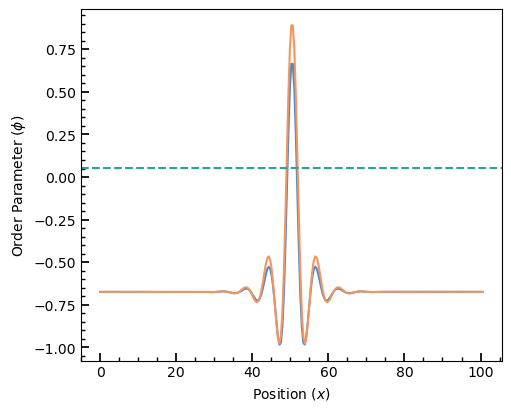

In [8]:
feeding_snapshots = []

for i in range(2):
    feeding_snapshots.append(np.loadtxt(r'Snapshots of Growth\ 257 eps=0.9 g=0.05 frame=' + f'{i*50+20}' + '.txt'))


colors = ['#5287C6','#F3965E','#C00A35','#24A793']


# gridspec inside gridspec
fig = plt.figure(layout='constrained', figsize=(5, 4))
subfigs = fig.subfigures(wspace=0.07)

ax = subfigs.subplots()
for nn in range(2):
    curve = ax.plot(domain_points, feeding_snapshots[nn], color=colors[nn])#, linestyle='dashed')

ax.axhline(center-width/2, color=colors[3], linestyle='dashed', label=r'Growth Threshold')
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='major', direction="in", width=1.25, length=6.0)
ax.tick_params(which='minor', direction="in", width=1.0, length=3.0)
#ax.legend(loc='lower right')
ax.set_xlabel(r'Position ($x$)')
ax.set_ylabel(r'Order Parameter ($\phi$)')



plt.savefig('High g Widening.jpg', dpi=1800)
plt.show()